**Installing fbprophet**

In [ ]:
!pip install fbprophet

**Uploading Dataset**

In [ ]:
from google.colab import files
file = files.upload()

Saving gs.us.txt to gs.us.txt


**Reading Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('gs.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
4656,2017-11-06,243.50,244.579,241.67,243.49,1733854,0
4657,2017-11-07,243.91,244.980,238.84,239.81,2435057,0
4658,2017-11-08,239.20,242.320,237.55,241.25,2349422,0
4659,2017-11-09,239.51,242.367,237.84,240.79,2122535,0
4660,2017-11-10,241.69,243.320,240.00,240.15,1844519,0


**Dataset Description**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4661 non-null   object 
 1   Open     4661 non-null   float64
 2   High     4661 non-null   float64
 3   Low      4661 non-null   float64
 4   Close    4661 non-null   float64
 5   Volume   4661 non-null   int64  
 6   OpenInt  4661 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 255.0+ KB


**In case of FBProphet the datetime column will be denoted as 'ds' and the prediction column will be denoted as 'y'**

**Here we ca see the datetime format is as per the fbprophet model in this dataset.**

**Here We are interested in the Date and High Stock price values. As, Date will count as the Time Series data index and High will be the time series data.**

**Prepare Expected Column Names**

In [ ]:
df.reset_index(inplace=True)
data = df[['Date','High']]
data = data.rename(columns={'Date': 'ds', 'High': 'y'})
data.head()

,ds,y
0,1999-05-04,68.780
1,1999-05-05,62.213
2,1999-05-06,61.773
3,1999-05-07,66.671
4,1999-05-10,65.441


**The graph of dataset**

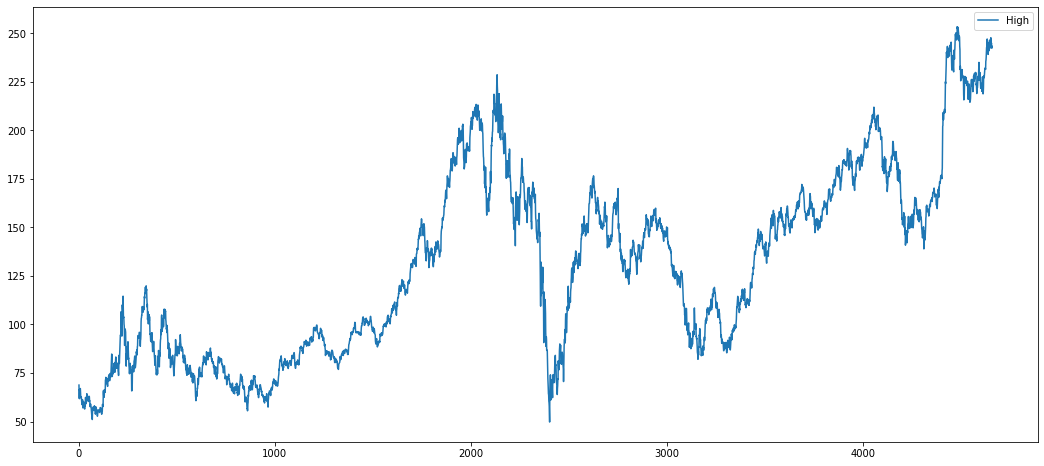

In [ ]:
from matplotlib import pyplot
df[['Date', 'High']].plot(figsize=(18,8))
pyplot.show()

**Model Bulid**

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Make an In-Sample Forecast**

In [ ]:
data

,ds,y
0,1999-05-04,68.780
1,1999-05-05,62.213
2,1999-05-06,61.773
3,1999-05-07,66.671
4,1999-05-10,65.441
...,...,...
4656,2017-11-06,244.579
4657,2017-11-07,244.980
4658,2017-11-08,242.320
4659,2017-11-09,242.367


In [ ]:
future_dates = model.make_future_dataframe(periods = 365) 
future_dates

,ds
0,1999-05-04
1,1999-05-05
2,1999-05-06
3,1999-05-07
4,1999-05-10
...,...
5021,2018-11-06
5022,2018-11-07
5023,2018-11-08
5024,2018-11-09


**Based on new created date predicting the High Stock Price**

In [ ]:
prediction = model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-05-04,58.927115,38.466987,78.904794,58.927115,58.927115,0.168226,0.168226,0.168226,-1.802338,-1.802338,-1.802338,1.970565,1.970565,1.970565,0.0,0.0,0.0,59.095341
1,1999-05-05,59.005386,40.109392,80.223765,59.005386,59.005386,0.087234,0.087234,0.087234,-1.737284,-1.737284,-1.737284,1.824518,1.824518,1.824518,0.0,0.0,0.0,59.092620
2,1999-05-06,59.083657,39.578810,80.698472,59.083657,59.083657,0.037172,0.037172,0.037172,-1.621385,-1.621385,-1.621385,1.658557,1.658557,1.658557,0.0,0.0,0.0,59.120829
3,1999-05-07,59.161929,39.402937,79.348321,59.161929,59.161929,-0.331138,-0.331138,-0.331138,-1.805766,-1.805766,-1.805766,1.474628,1.474628,1.474628,0.0,0.0,0.0,58.830791
4,1999-05-10,59.396743,38.397547,78.072512,59.396743,59.396743,-0.961477,-0.961477,-0.961477,-1.801916,-1.801916,-1.801916,0.840439,0.840439,0.840439,0.0,0.0,0.0,58.435266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,2018-11-06,239.305610,208.532880,268.173817,221.383271,258.489829,-0.428935,-0.428935,-0.428935,-1.802338,-1.802338,-1.802338,1.373403,1.373403,1.373403,0.0,0.0,0.0,238.876674
5022,2018-11-07,239.352218,209.686136,266.995554,221.354665,258.609190,-0.467407,-0.467407,-0.467407,-1.737284,-1.737284,-1.737284,1.269877,1.269877,1.269877,0.0,0.0,0.0,238.884811
5023,2018-11-08,239.398826,212.539362,269.621066,221.326058,258.727992,-0.460999,-0.460999,-0.460999,-1.621385,-1.621385,-1.621385,1.160386,1.160386,1.160386,0.0,0.0,0.0,238.937827
5024,2018-11-09,239.445434,211.081924,267.238205,221.297451,258.846024,-0.757841,-0.757841,-0.757841,-1.805766,-1.805766,-1.805766,1.047925,1.047925,1.047925,0.0,0.0,0.0,238.687593


In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-05-04,58.927115,38.466987,78.904794,58.927115,58.927115,0.168226,0.168226,0.168226,-1.802338,-1.802338,-1.802338,1.970565,1.970565,1.970565,0.0,0.0,0.0,59.095341
1,1999-05-05,59.005386,40.109392,80.223765,59.005386,59.005386,0.087234,0.087234,0.087234,-1.737284,-1.737284,-1.737284,1.824518,1.824518,1.824518,0.0,0.0,0.0,59.092620
2,1999-05-06,59.083657,39.578810,80.698472,59.083657,59.083657,0.037172,0.037172,0.037172,-1.621385,-1.621385,-1.621385,1.658557,1.658557,1.658557,0.0,0.0,0.0,59.120829
3,1999-05-07,59.161929,39.402937,79.348321,59.161929,59.161929,-0.331138,-0.331138,-0.331138,-1.805766,-1.805766,-1.805766,1.474628,1.474628,1.474628,0.0,0.0,0.0,58.830791
4,1999-05-10,59.396743,38.397547,78.072512,59.396743,59.396743,-0.961477,-0.961477,-0.961477,-1.801916,-1.801916,-1.801916,0.840439,0.840439,0.840439,0.0,0.0,0.0,58.435266


In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5021,2018-11-06,239.305610,208.532880,268.173817,221.383271,258.489829,-0.428935,-0.428935,-0.428935,-1.802338,-1.802338,-1.802338,1.373403,1.373403,1.373403,0.0,0.0,0.0,238.876674
5022,2018-11-07,239.352218,209.686136,266.995554,221.354665,258.609190,-0.467407,-0.467407,-0.467407,-1.737284,-1.737284,-1.737284,1.269877,1.269877,1.269877,0.0,0.0,0.0,238.884811
5023,2018-11-08,239.398826,212.539362,269.621066,221.326058,258.727992,-0.460999,-0.460999,-0.460999,-1.621385,-1.621385,-1.621385,1.160386,1.160386,1.160386,0.0,0.0,0.0,238.937827
5024,2018-11-09,239.445434,211.081924,267.238205,221.297451,258.846024,-0.757841,-0.757841,-0.757841,-1.805766,-1.805766,-1.805766,1.047925,1.047925,1.047925,0.0,0.0,0.0,238.687593
5025,2018-11-10,239.492042,216.739416,273.773423,221.268845,259.031770,5.319763,5.319763,5.319763,4.384345,4.384345,4.384345,0.935419,0.935419,0.935419,0.0,0.0,0.0,244.811805


**Visualization of Prediction**

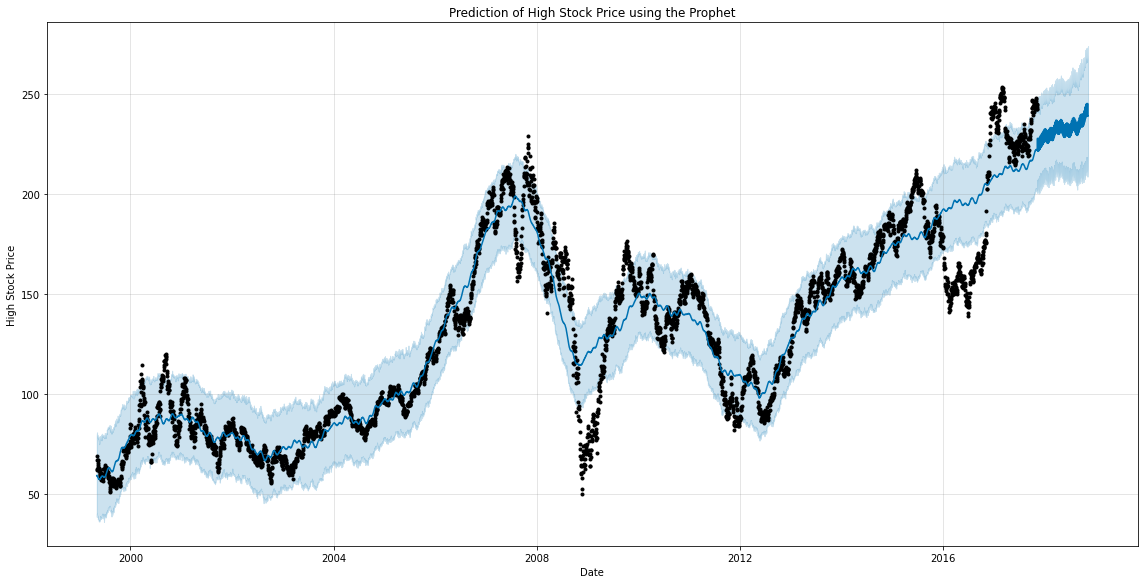

In [ ]:
from matplotlib import pyplot as plt
model.plot(prediction, figsize =(16,8))
plt.title('Prediction of High Stock Price using the Prophet')
plt.xlabel('Date')
plt.ylabel('High Stock Price')
plt.show()

**Decomposition**

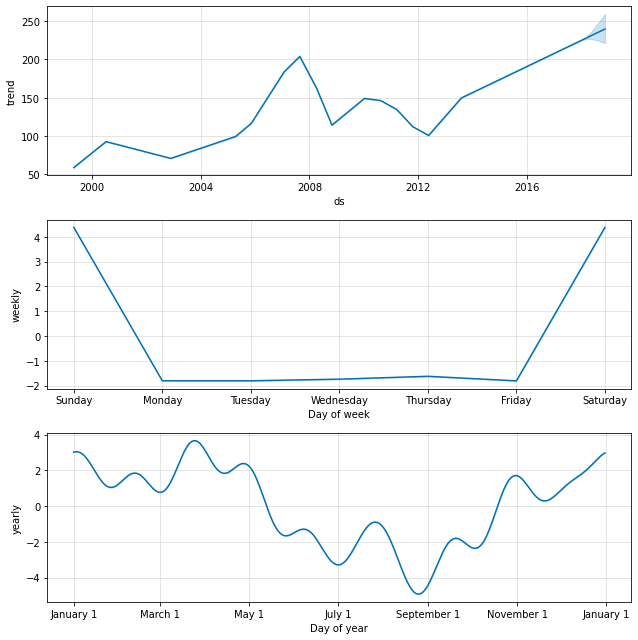

In [ ]:
model.plot_components(prediction);

In [ ]:
!pip install Prophet

     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 178 kB 11.0 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640065 sha256=cbcb4f61c4957ee7d54db6b7b7ecfd799c39d60aad0f7511c336849f74ba11b0
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


**Changepoints Analysis**

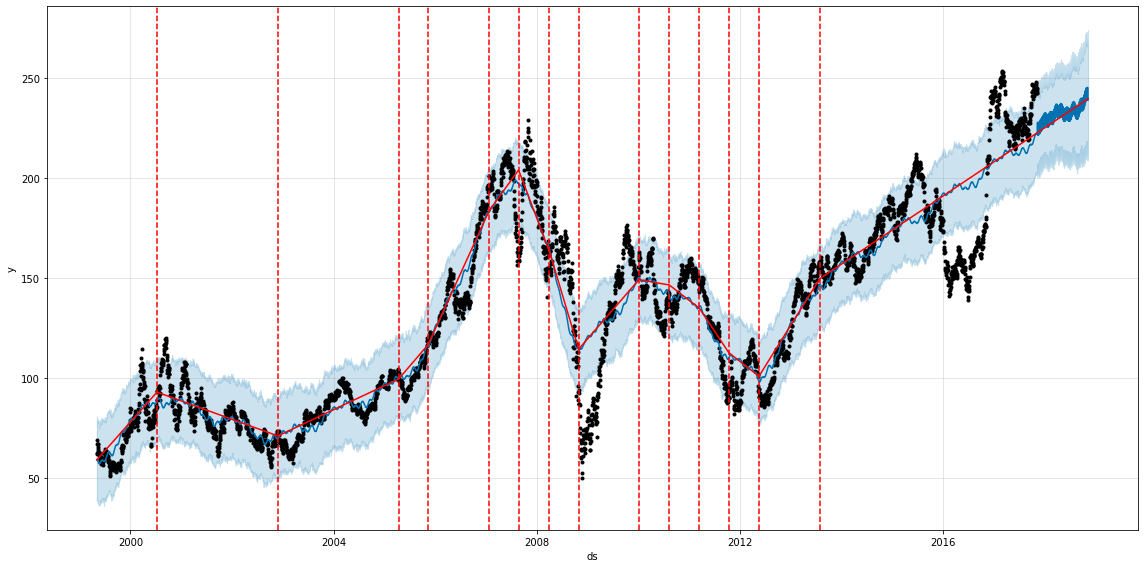

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction, figsize = (16,8))
a = add_changepoints_to_plot(fig.gca(), model, prediction)

**Cross Validation Analysis**

In [ ]:
from fbprophet.diagnostics import cross_validation

cv = cross_validation(model, initial = '3285 days', period = '180 days', horizon = '365 days')

INFO:fbprophet:Making 18 forecasts with cutoffs between 2008-06-25 00:00:00 and 2016-11-10 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

In [ ]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-06-26,185.519380,171.699462,200.382608,164.61,2008-06-25
1,2008-06-27,185.683344,170.073898,200.864179,162.59,2008-06-25
2,2008-06-30,186.006891,172.023592,200.836206,162.57,2008-06-25
3,2008-07-01,186.203228,172.804231,200.778957,161.48,2008-06-25
4,2008-07-02,186.246854,171.432108,201.008839,166.59,2008-06-25


In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4523,2017-11-06,188.051038,156.247415,218.102097,244.579,2016-11-10
4524,2017-11-07,187.942061,156.697475,218.297659,244.980,2016-11-10
4525,2017-11-08,187.917796,157.157490,216.940540,242.320,2016-11-10
4526,2017-11-09,187.913167,155.754702,217.735710,242.367,2016-11-10
4527,2017-11-10,187.628498,155.477032,218.006089,243.320,2016-11-10


**Performanec metrics**

In [ ]:
from fbprophet.diagnostics import performance_metrics

p = performance_metrics(cv)
p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1116.070525,33.407642,27.563509,0.210045,0.191621,0.348083
1,39 days,1137.954288,33.733578,27.859177,0.211477,0.200089,0.346608
2,40 days,1162.659150,34.097788,28.226139,0.213178,0.200089,0.342518
3,41 days,1184.757496,34.420306,28.577713,0.214911,0.206982,0.337474
4,42 days,1188.213436,34.470472,28.630321,0.215114,0.206982,0.338496


In [ ]:
p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
323,361 days,3586.710600,59.889153,53.144446,0.374090,0.376527,0.273599
324,362 days,3585.386877,59.878100,53.058206,0.374381,0.371185,0.275868
325,363 days,3582.564444,59.854527,52.906602,0.373336,0.373520,0.277655
326,364 days,3572.955523,59.774204,52.777158,0.372557,0.376527,0.279314
327,365 days,3576.211842,59.801437,52.773889,0.372627,0.376527,0.279782


**Visualization of different error percentage**

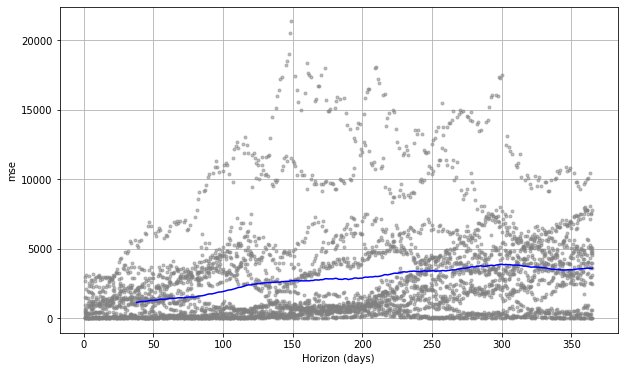

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(cv, metric = 'mse')

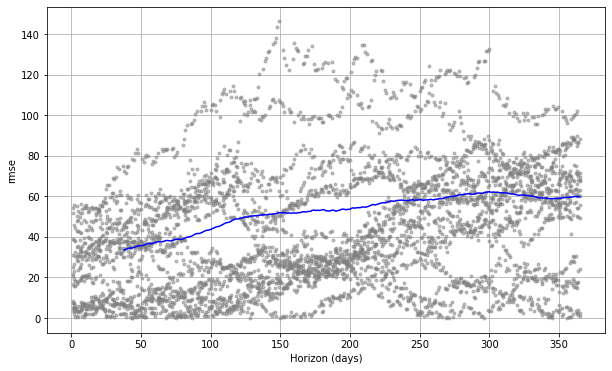

In [ ]:
fig = plot_cross_validation_metric(cv, metric = 'rmse')

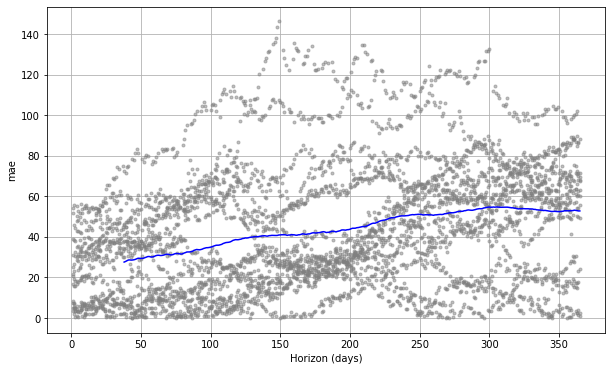

In [ ]:
fig = plot_cross_validation_metric(cv, metric = 'mae')

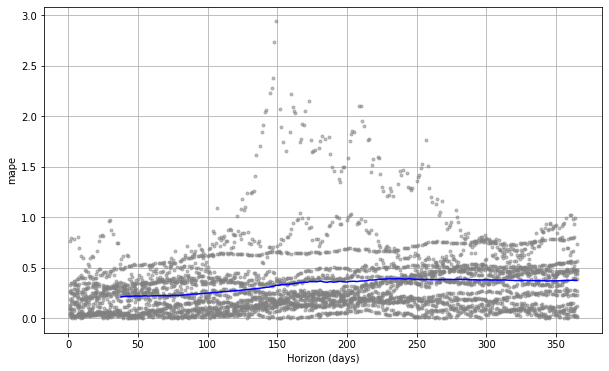

In [ ]:
fig = plot_cross_validation_metric(cv, metric = 'mape')

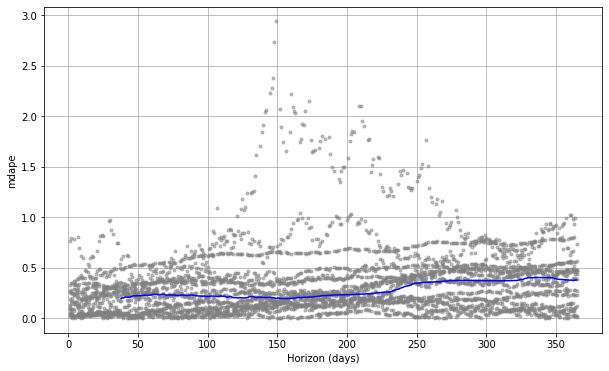

In [ ]:
fig = plot_cross_validation_metric(cv, metric = 'mdape')